# Human Resources Data Set

## Challenges:
1. Is there any relationship between who a person works for and their performance score?
2. What is the overall diversity profile of the organization?
3. What are our best recruiting sources if we want to ensure a diverse organization?
4. Are there areas of the company where pay is not equitable?

Let's start be installing, importing some essential libs

In [1]:
'''!pip install pandas
!pip install scipy
!pip install openpyxl
!pip install opendatasets
'''

'!pip install pandas\n!pip install scipy\n!pip install openpyxl\n!pip install opendatasets\n'

In [2]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
'''

od.download(
    "https://www.kaggle.com/datasets/rhuebner/human-resources-data-set")'''

'\n\nod.download(\n    "https://www.kaggle.com/datasets/rhuebner/human-resources-data-set")'

Let's open our CSV file and see what's going on

In [4]:
df = pd.read_csv('human-resources-data-set\HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## FIRST CHALLENGE
1. Is there any relationship between who a person works for and their performance score?<br>
Well, Calculating correlation factors between managers and performance can give insights about this issue

<Axes: title={'center': 'PerfScoreID distribution'}, ylabel='Density'>

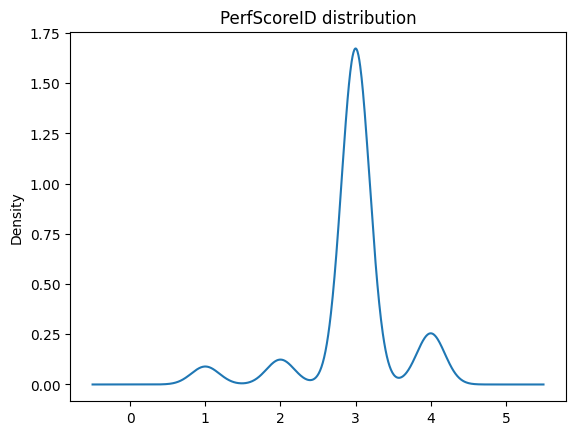

In [5]:
df['PerfScoreID'].plot(kind='kde', title='PerfScoreID distribution')

### Creating heatMap

In [147]:
corr_mtrx = df.select_dtypes(include=['number']).dropna().corr()
corr_mtrx

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.062158,-0.046993,0.021896,0.070305,0.110422,-0.693146,0.045900,-0.121520,0.090733,-0.035290,0.025987,0.090236,-0.592437,-0.140158,-0.046768,0.500112,-0.022456
MarriedID,0.062158,1.000000,0.161445,-0.015587,0.085930,-0.118593,-0.065815,-0.015476,0.025431,0.072646,-0.024243,-0.043937,-0.094002,-0.098565,-0.128196,0.057974,0.000306,0.094382
MaritalStatusID,-0.046993,0.161445,1.000000,-0.018441,0.114500,0.014883,0.044699,0.040102,-0.075196,0.097783,0.023729,0.009160,0.023065,0.027993,0.014361,-0.054801,-0.099787,0.022698
GenderID,0.021896,-0.015587,-0.018441,1.000000,-0.033226,-0.038250,-0.050858,0.030913,0.054968,-0.018322,-0.080960,0.048723,-0.043218,-0.023160,-0.045328,0.086832,0.080436,-0.003725
EmpStatusID,0.070305,0.085930,0.114500,-0.033226,1.000000,0.092687,-0.067160,0.187077,-0.114473,0.951902,0.227131,-0.154020,0.234222,0.020927,0.011888,-0.172864,0.075720,0.088261
DeptID,0.110422,-0.118593,0.014883,-0.038250,0.092687,1.000000,-0.087784,-0.127344,-0.446431,0.073265,0.026348,0.293314,0.550240,-0.097567,0.031280,-0.784303,0.128071,0.055640
PerfScoreID,-0.693146,-0.065815,0.044699,-0.050858,-0.067160,-0.087784,1.000000,0.014537,0.137361,-0.085338,0.002851,-0.056953,-0.060552,0.549614,0.301823,0.049550,-0.737238,0.041969
FromDiversityJobFairID,0.045900,-0.015476,0.040102,0.030913,0.187077,-0.127344,0.014537,1.000000,0.037952,0.142859,0.018774,-0.030627,0.007570,-0.011568,-0.033900,0.027128,0.039923,0.061585
Salary,-0.121520,0.025431,-0.075196,0.054968,-0.114473,-0.446431,0.137361,0.037952,1.000000,-0.102670,-0.127154,-0.040219,-0.435406,0.069654,0.069963,0.506135,-0.073247,0.085737
Termd,0.090733,0.072646,0.097783,-0.018322,0.951902,0.073265,-0.085338,0.142859,-0.102670,1.000000,0.156465,-0.145063,0.209113,-0.014269,-0.002525,-0.158772,0.131425,0.096085


<Axes: >

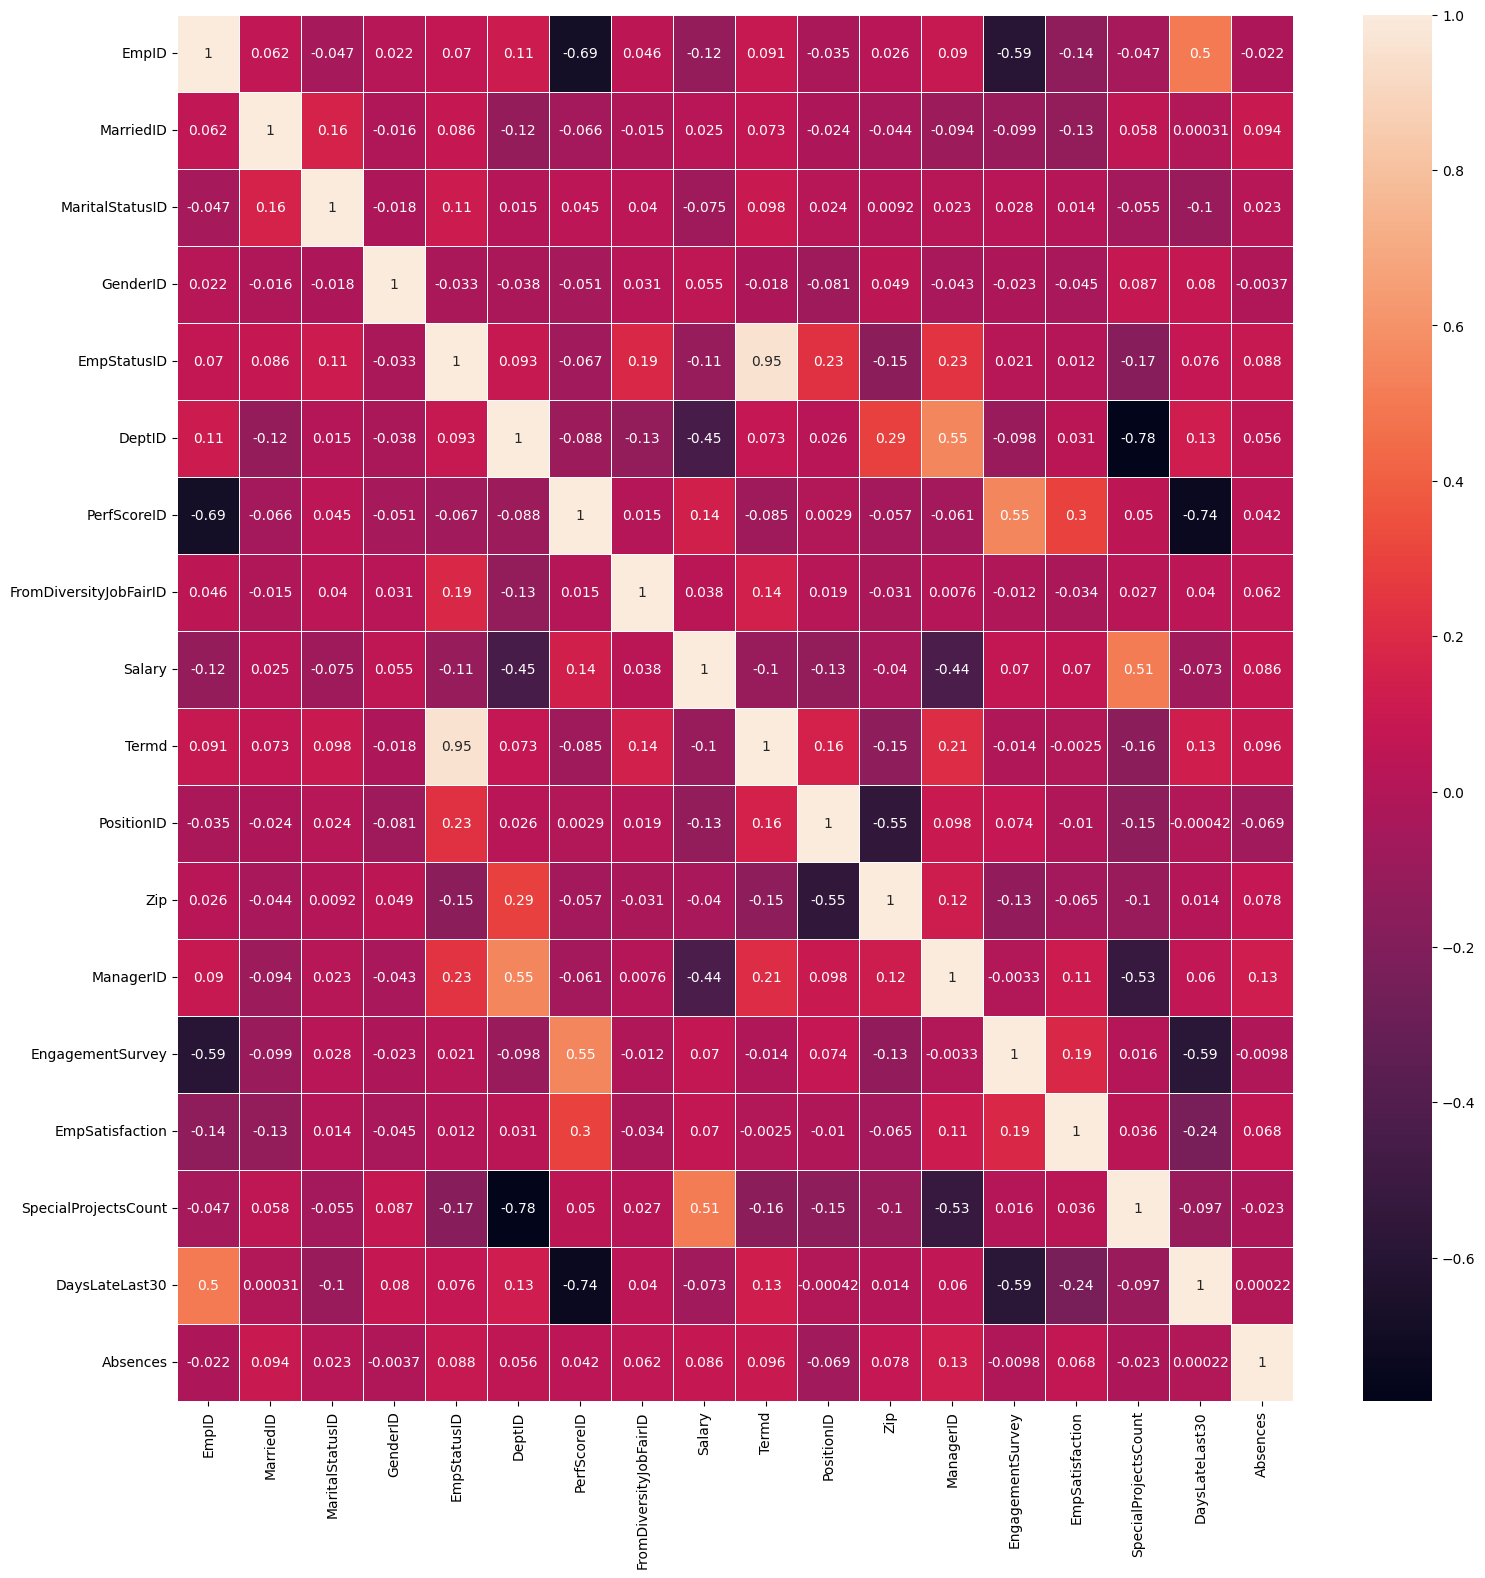

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
sns.heatmap(corr_mtrx, annot=True, linewidths=.5)

Let's extract all corelations more than |0.3| and see what factors are related to each other

In [157]:
def correlation(dataset, threshold, columns):
    col_corr_name = set()
    col_corr_val = set()

    corr_matrix = dataset.corr()  

    for i in range(dataset.shape[1]):
        for j in range(i):  # Start from i+1 to avoid self-correlation and duplicate pairs
            corr_val = corr_matrix.iloc[i, j]

            if abs(corr_val) > threshold:
                col_corr_name.add((columns[i], columns[j]))  # Store column pairs with high correlation
                col_corr_val.add(corr_val)

    return col_corr_name, col_corr_val

In [158]:
corr_features, corr_val = correlation(x, 0.6, numeric_df.keys())
corr_features, corr_val

({('DaysLateLast30', 'PerfScoreID'),
  ('PerfScoreID', 'EmpID'),
  ('SpecialProjectsCount', 'DeptID'),
  ('Termd', 'EmpStatusID')},
 {-0.7843025027265298,
  -0.7372384202828536,
  -0.6931464604283386,
  0.9519019680900455})

EmpID can affect performance score, it's so weird!!!!!!!<br>
It's important to remember that correlation does not imply causation. A high correlation between two variables, such as 'EmpID' and 'PerfScoreID,' does not necessarily mean that one directly causes the other. 

Let's see the relationship between manager and average performance score

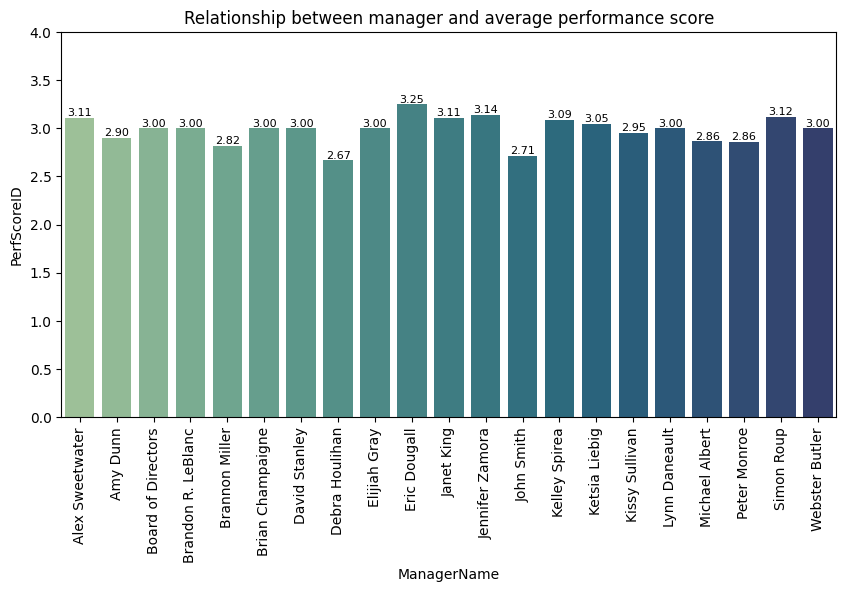

In [72]:
avgscore = df.groupby('ManagerName')['PerfScoreID'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 5))
plt.ylim(0, 4)
plt.xticks(rotation=90)
plt.title(f'Relationship between manager and average performance score')
sns.barplot(data=avgscore, x='ManagerName', y='PerfScoreID', palette='crest')
for index, row in avgscore.iterrows():
    plt.text(index, row['PerfScoreID'], f'{row["PerfScoreID"]:.2f}', ha='center', va='bottom', fontsize=8)


## CHALLENGE TWO
2. What is the overall diversity profile of the organization?


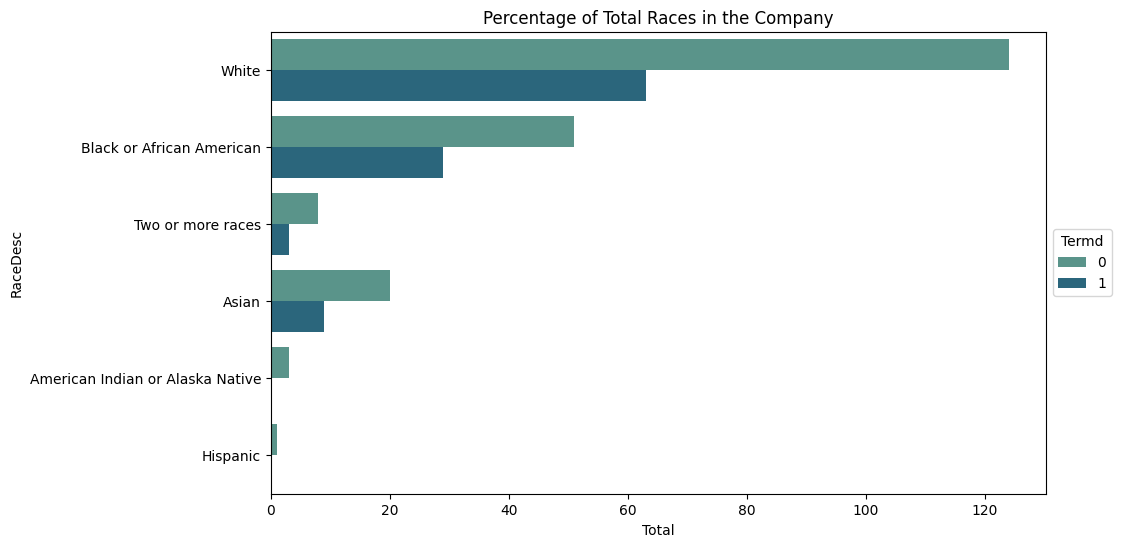

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=df['RaceDesc'], palette='crest', hue='Termd')
plt.title('Percentage of Total Races in the Company')
plt.xlabel('Total')
plt.ylabel('RaceDesc')
plt.legend(title='Termd', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## CHALLENGE THREE
3. What are our best recruiting sources if we want to ensure a diverse organization?


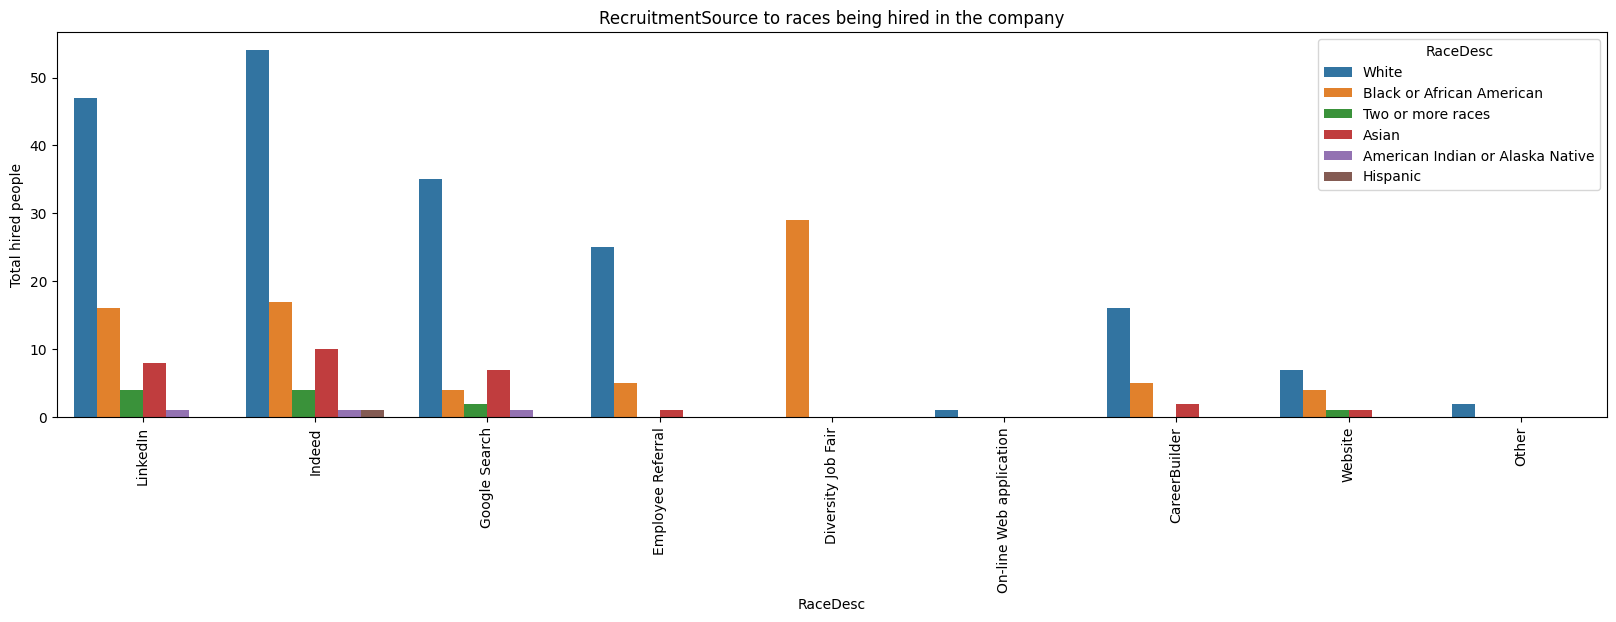

,RecruitmentSource,RaceDesc,Count
0,CareerBuilder,White,16
1,CareerBuilder,Black or African American,5
2,CareerBuilder,Asian,2
3,Diversity Job Fair,Black or African American,29
4,Employee Referral,White,25
5,Employee Referral,Black or African American,5
6,Employee Referral,Asian,1
7,Google Search,White,35
8,Google Search,Asian,7
9,Google Search,Black or African American,4


In [101]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x=df['RecruitmentSource'], hue='RaceDesc')
plt.title('RecruitmentSource to races being hired in the company')
plt.ylabel('Total hired people')
plt.xlabel('RaceDesc')
plt.xticks(rotation=90)
plt.show()

df.groupby(['RecruitmentSource'])['RaceDesc'].value_counts().reset_index(name='Count')

### CHALLENGE FOUR
4. Are there areas of the company where pay is not equitable?

<Axes: title={'center': 'Salary distribution'}, ylabel='Frequency'>

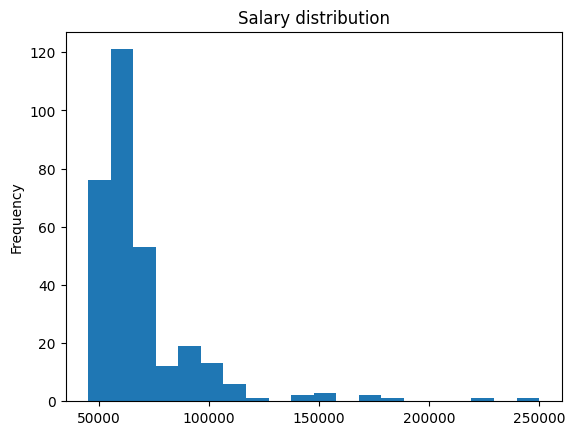

In [132]:
df['Salary'].plot(kind='hist', bins=20,  title='Salary distribution')

mean     69020.684887
min      45046.000000
max     250000.000000
std      25156.636930
Name: Salary, dtype: float64

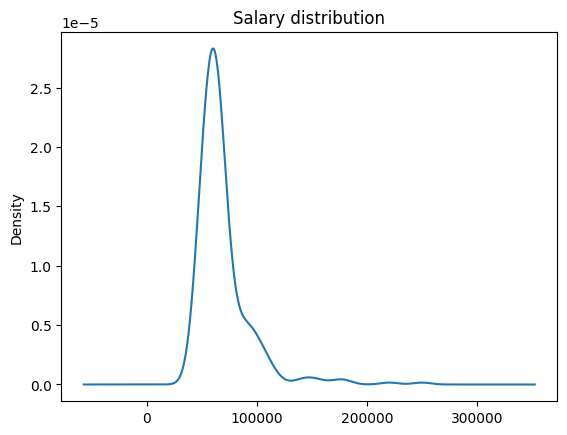

In [172]:
df['Salary'].plot(kind='kde', title='Salary distribution')
df['Salary'].describe()[['mean', 'min', 'max', 'std']]

<Axes: xlabel='Department', ylabel='AVGSalaryPerDep'>

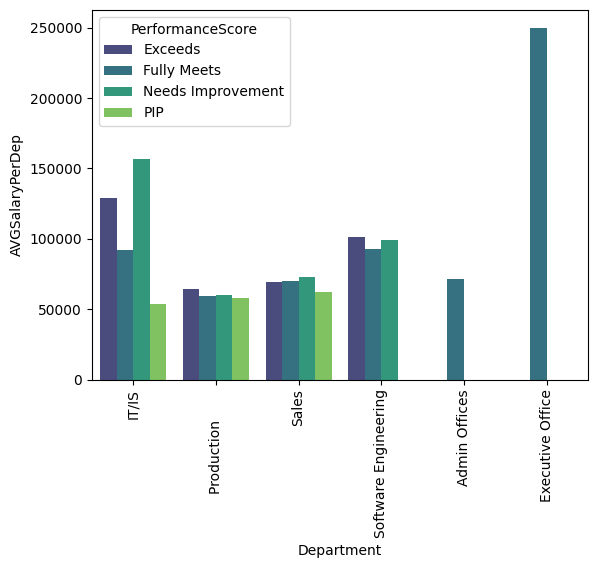

In [115]:
data = df.groupby(['PerformanceScore', 'Department'])['Salary'].mean().reset_index(name='AVGSalaryPerDep')

plt.xticks(rotation=90)
sns.barplot(x='Department', y='AVGSalaryPerDep', data=data, hue='PerformanceScore', palette='viridis')

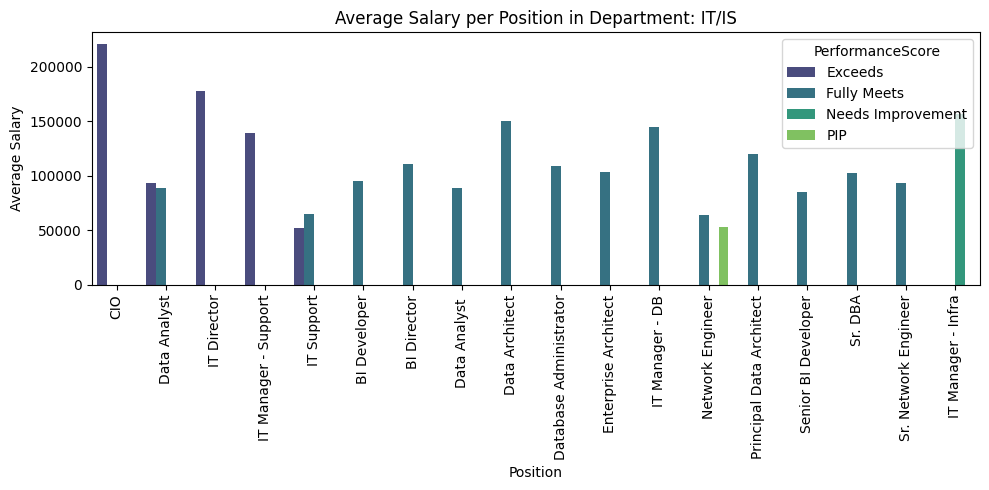

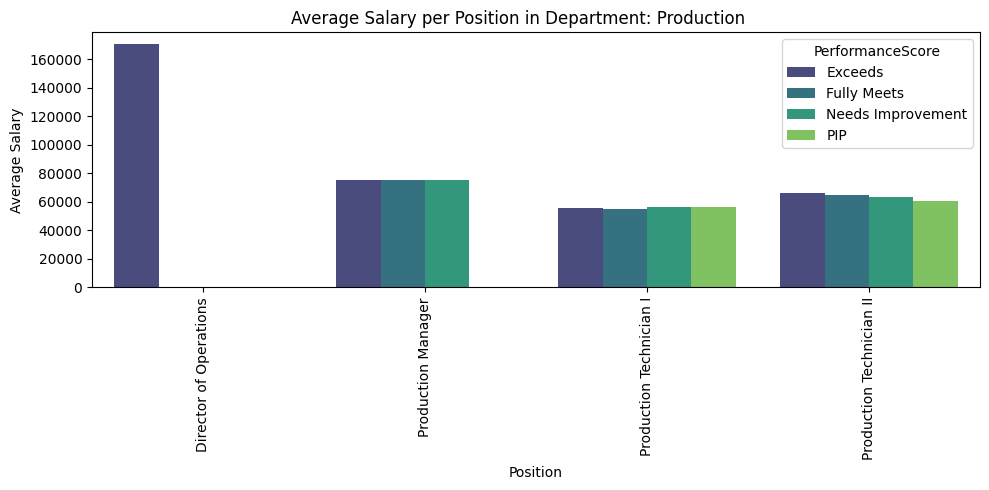

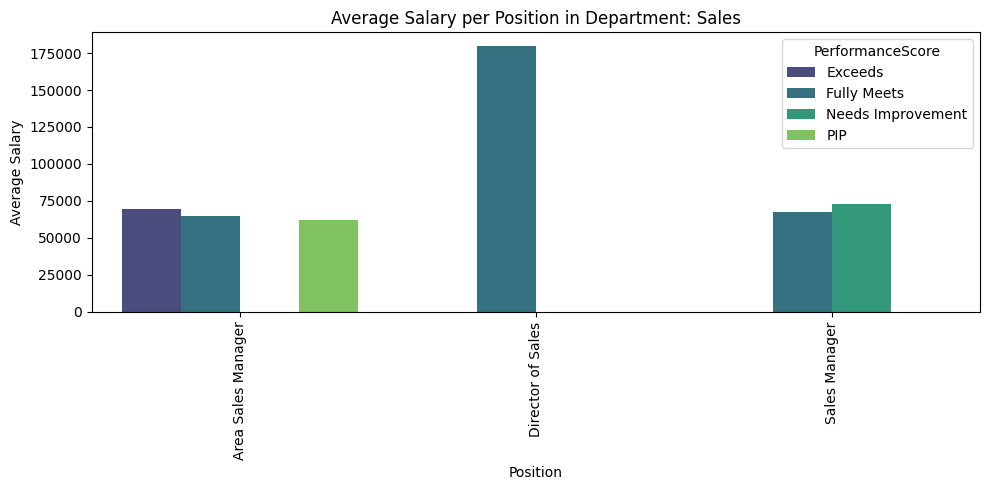

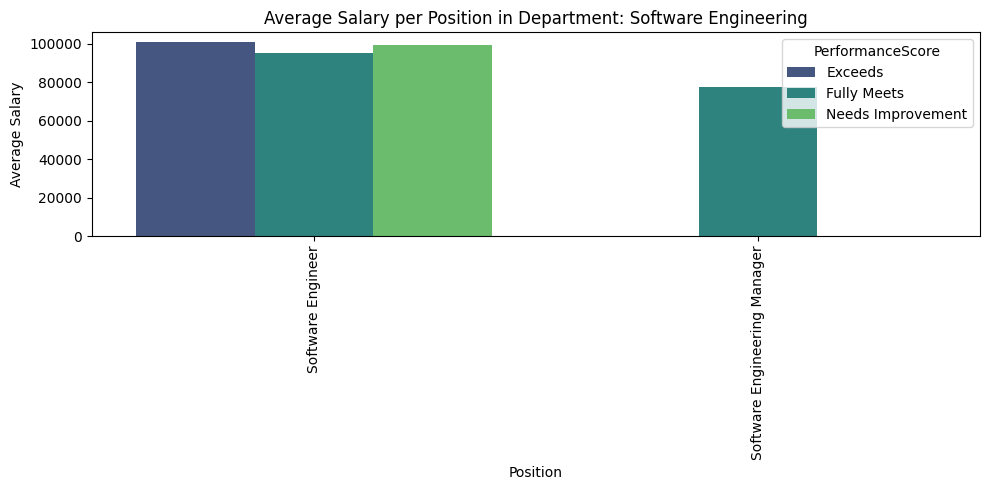

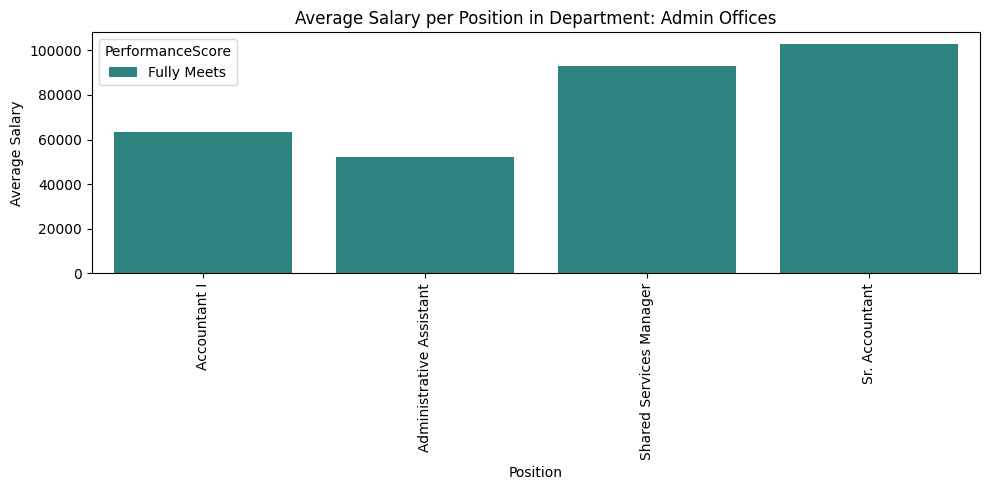

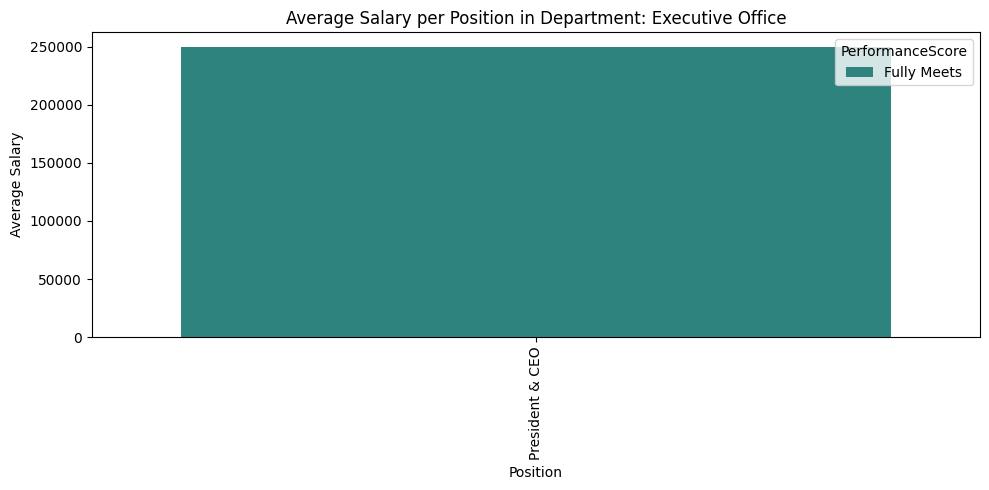

In [114]:
# Calculate the average salary per department, position, and performance score
data = df.groupby(['PerformanceScore', 'Department', 'Position'])['Salary'].mean().reset_index(name='AVGSalaryPerDep')

# Get unique departments
unique_departments = data['Department'].unique()

# Create separate bar plots for each department
for dep in unique_departments:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Position', y='AVGSalaryPerDep', data=data[data['Department'] == dep], hue='PerformanceScore', palette='viridis')
    plt.title(f'Average Salary per Position in Department: {dep}')
    plt.xlabel('Position')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.legend(title='PerformanceScore')
    plt.tight_layout()
    plt.show()
